In [1]:
import plot_global
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np
from scipy.interpolate import interp1d
from read_and_plot import *

d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Fuel_Reduction'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Electricity_Reduction'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
d:\program\Aimsun\digital_twin_aimsun\plot_scripts\plot_global.py:46: SettingWi

In [2]:
statistics_df = plot_global.statistics_df
vehicle_fleet = '2030'
demand_percentage = 150
eco_routing_with_travel_time = 0
prediction_horizon = 10

target_df = statistics_df[(statistics_df['Vehicle_Fleet'] == vehicle_fleet) 
             & (statistics_df['Demand_Percentage(%)'] == demand_percentage) 
             & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == eco_routing_with_travel_time) 
             & (statistics_df['Prediction_Horizon(min)'] == prediction_horizon)]

# # target_df.reset_index(drop=True, inplace=True)
target_df


,Time,Demand_Percentage(%),Prediction_Horizon(min),CAV_Penetration(%),Eco_Routing_with_Travel_Time(0/1),Vehicle_Fleet,Overall_Travel_Time_Avg(s),Overall_Fuel_Used(gallon),Overall_Electricity_Used(kWh),Overall_Fuel_Cost($),...,Overall_Electricity_Reduction,ICE_Reduction,BEV_Reduction,PHEV_Reduction,HFCV_Reduction,Money_Reduction,ICE_TravelTime_Reduction,BEV_TravelTime_Reduction,PHEV_TravelTime_Reduction,HFCV_TravelTime_Reduction
451,2.023080e+13,150,10,0,0,2030,1631.39,14161.5,18196.7,49565.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
452,2.023080e+13,150,10,10,0,2030,1595.81,13188.7,17142.9,46160.5,...,-5.791160,-8.919161,-12.141800,-14.096011,-22.292053,-6.778512,-12.784854,-5.549549,-3.154730,-7.764105
453,2.023080e+13,150,10,20,0,2030,1397.14,13203.4,19429.4,46211.7,...,6.774305,-11.541796,-4.582323,-6.190789,-21.938490,-5.627580,-18.006035,-9.492100,-6.865559,-16.423976
454,2.023080e+13,150,10,30,0,2030,1582.40,13975.1,18081.8,48912.8,...,-0.631433,-5.212246,-10.461486,-12.217825,-13.888154,-1.258686,-9.276931,6.560680,5.615420,-4.170297
455,2.023080e+13,150,10,40,0,2030,1519.74,13941.1,18745.9,48793.8,...,3.018130,-3.807637,-11.009970,-10.216326,-17.969921,-1.171777,-9.740900,-4.658820,-5.297473,-9.746011
456,2.023080e+13,150,10,50,0,2030,1516.67,13784.6,18386.9,48245.9,...,1.045244,-2.264878,-8.296987,-8.578797,-19.131310,-2.350115,-6.465573,-3.564759,-4.377034,-6.002411
457,2.023080e+13,150,10,60,0,2030,1473.42,13670.7,18160.0,47847.5,...,-0.201685,-4.837702,-6.326162,-8.057705,-16.041869,-3.191167,-10.788196,-4.442588,-4.707971,-6.592626
458,2.023080e+13,150,10,70,0,2030,1574.87,13967.0,17566.2,48884.5,...,-3.464914,-1.162436,-8.398472,-7.268111,-13.580165,-1.549182,-4.180617,1.541268,3.221536,-9.677978
459,2.023080e+13,150,10,80,0,2030,1602.91,14338.0,17165.4,50183.0,...,-5.667511,0.356381,-7.904991,-8.287754,-18.408750,0.665221,-2.247617,4.303143,2.363573,-4.614898
460,2.023080e+13,150,10,90,0,2030,1555.92,13956.4,16458.7,48847.4,...,-9.551182,-2.433024,-9.792924,-10.338312,-17.588427,-2.129379,-5.649036,-0.485908,0.586409,-10.380984


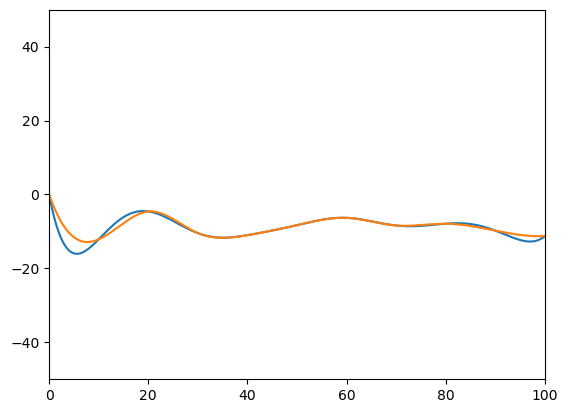

In [3]:
# test to smoothing the curve

fig, ax = plt.subplots()
x = target_df['CAV_Penetration(%)']
y = target_df['BEV_Reduction']
xnew = np.linspace(x.min(), x.max(), 300)
gfg = make_interp_spline(x, y, k = 5)
y_new = gfg(xnew)
plt.plot(xnew, y_new)
# plt.scatter(x,y)

ubic_interpolation_model = interp1d(x, y, kind = "cubic")
y_new = ubic_interpolation_model(xnew)
plt.plot(xnew, y_new)
# plt.scatter(x,y)
plt.ylim([-50, 50])
plt.xlim([0,100])
plt.show()
# ax.plot(test_df['CAV_Penetration(%)'], test_df['Overall_Fuel_Used(gallon)'], marker = "o", markersize = 5)

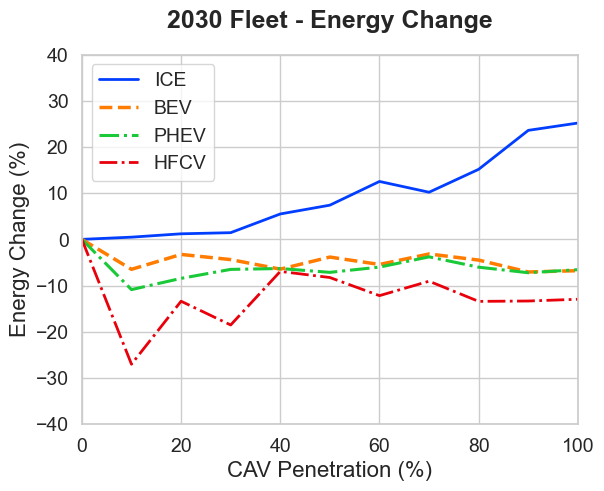

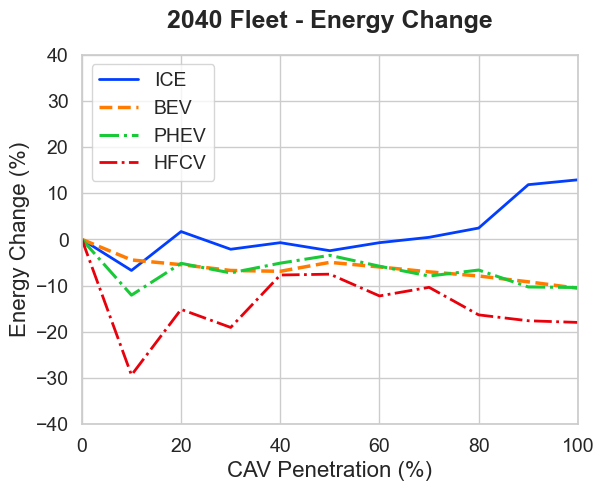

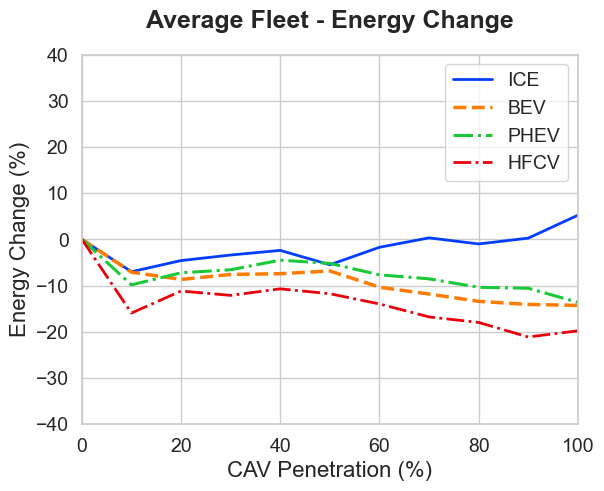

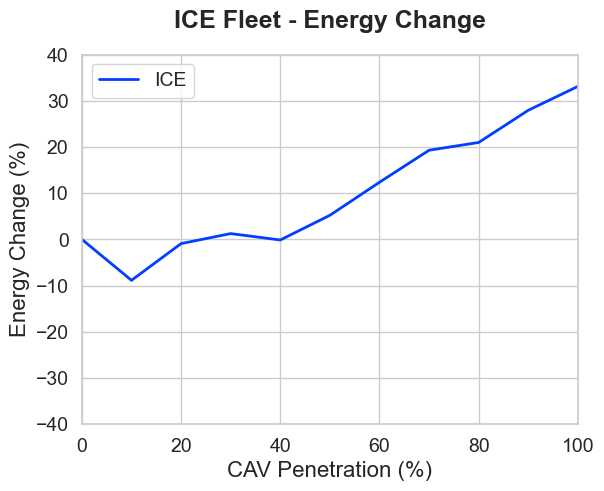

In [4]:
# Compare on different powertrain

whether_save_fig = False
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10

vehicle_fleet='2030'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='2040'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='Average'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='ICE'
plotAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)



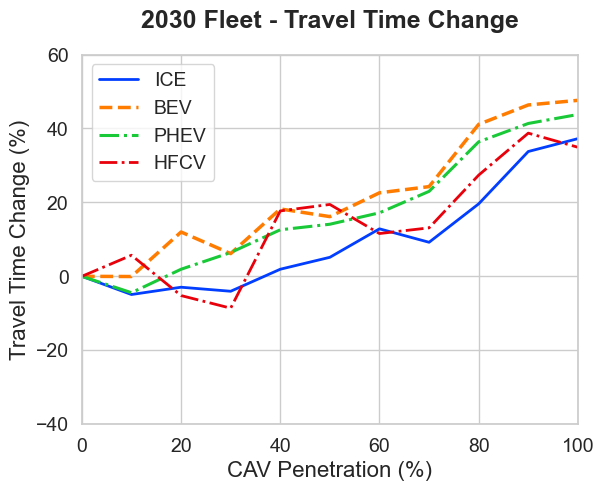

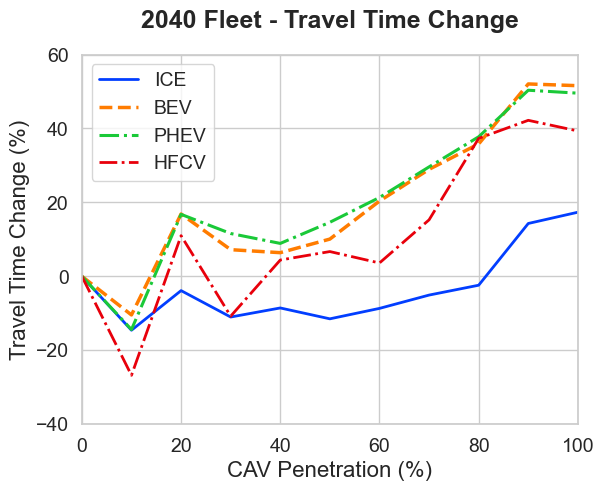

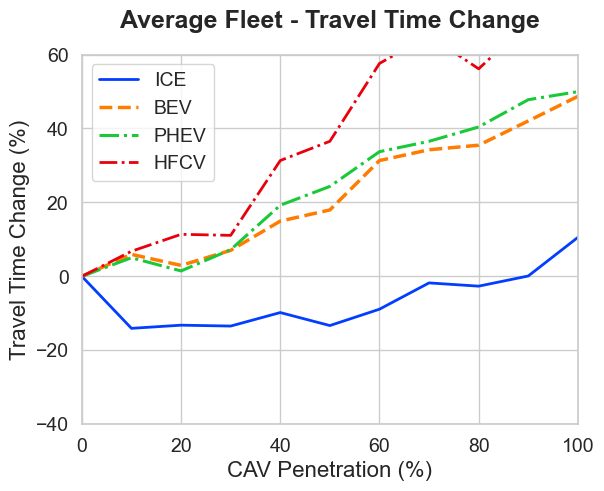

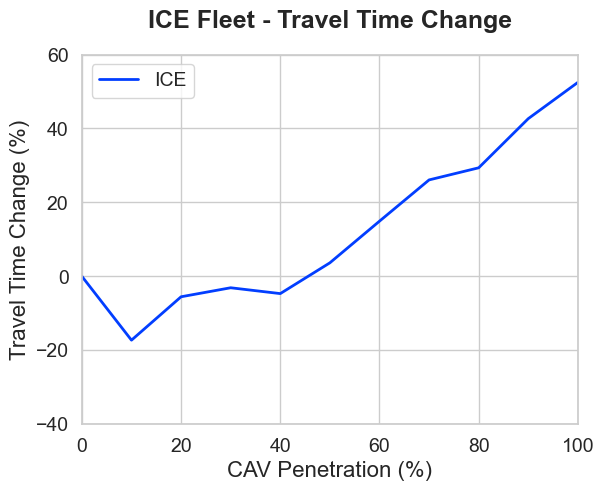

In [5]:
# Compare on travel time routings

whether_save_fig = False
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=10

vehicle_fleet='2030'
plotTravelTimeAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='2040'
plotTravelTimeAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='Average'
plotTravelTimeAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)
vehicle_fleet='ICE'
plotTravelTimeAllTypes(vehicle_fleet, demand_percentage, eco_routing_with_travel_time, prediction_horizon, save_fig = whether_save_fig)


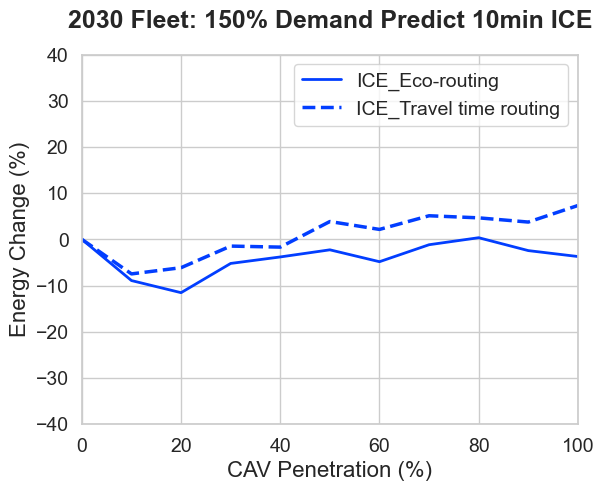

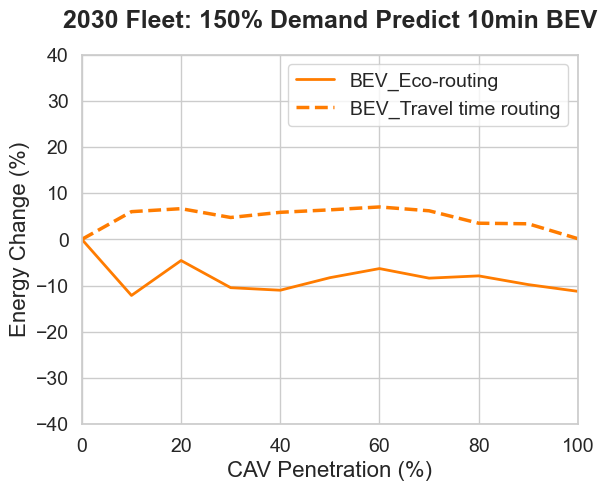

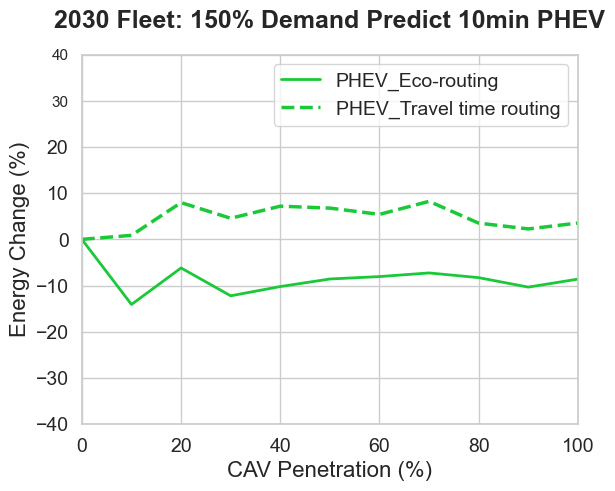

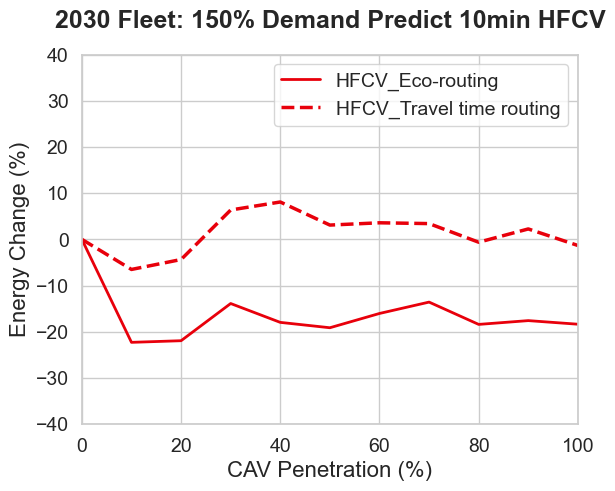

In [6]:
# compare eco-routing and travel time routing

vehicle_fleet='2030'
demand_percentage=150
prediction_horizon=10

whether_save_fig = False
vehicle_type='ICE'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='BEV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='PHEV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)
vehicle_type='HFCV'
plotComparisonEcoRouting(vehicle_type, vehicle_fleet, demand_percentage, prediction_horizon, save_fig = whether_save_fig)



In [7]:
statistics_df.columns

Index(['Time', 'Demand_Percentage(%)', 'Prediction_Horizon(min)',
       'CAV_Penetration(%)', 'Eco_Routing_with_Travel_Time(0/1)',
       'Vehicle_Fleet', 'Overall_Travel_Time_Avg(s)',
       'Overall_Fuel_Used(gallon)', 'Overall_Electricity_Used(kWh)',
       'Overall_Fuel_Cost($)', 'Overall_Electricity_Cost($)',
       'Total_Number_of_Vehicles', 'Travel_Time_ICE_Avg(s)',
       'Travel_Time_ICE_NONCAV_Avg(s)', 'Travel_Time_BEV_Avg(s)',
       'Travel_Time_BEV_NONCAV_Avg(s)', 'Travel_Time_PHEV_Avg(s)',
       'Travel_Time_PHEV_NONCAV_Avg(s)', 'Travel_Time_HFCV_Avg(s)',
       'Travel_Time_HFCV_NONCAV_Avg(s)', 'Fuel_Used_ICE_Avg(gallon)',
       'Fuel_Used_ICE_NONCAV_Avg(gallon)', 'Fuel_Used_BEV_Avg(gallon)',
       'Fuel_Used_BEV_NONCAV_Avg(gallon)', 'Fuel_Used_PHEV_Avg(gallon)',
       'Fuel_Used_PHEV_NONCAV_Avg(gallon)', 'Fuel_Used_HFCV_Avg(gallon)',
       'Fuel_Used_HFCV_NONCAV_Avg(gallon)', 'Electricity_Used_ICE_Avg(kWh)',
       'Electricity_Used_ICE_NONCAV_Avg(kWh)', 'Electri

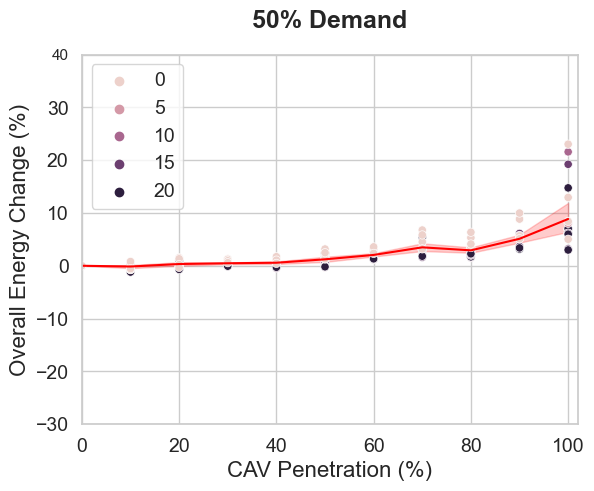

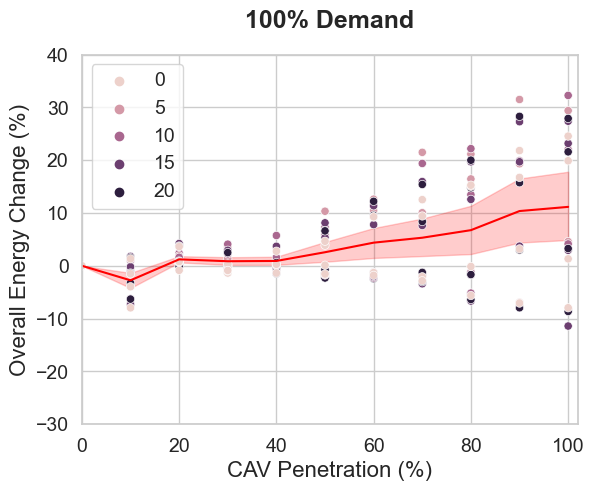

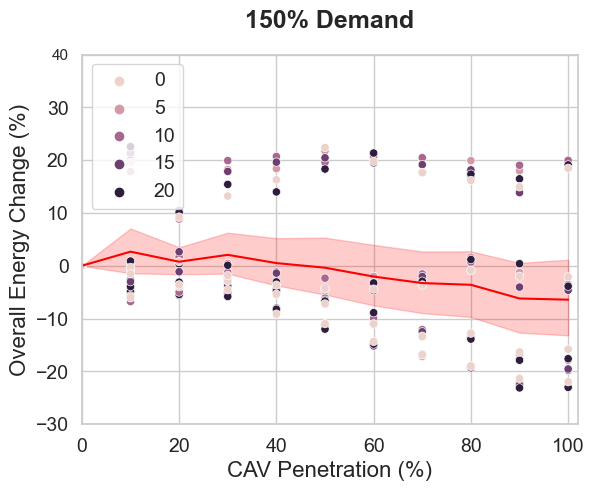

In [8]:
# compare different demands

whether_save_fig = False
demand_percentage = 50
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)
demand_percentage = 100
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)
demand_percentage = 150
plotOptimumCAV(demand_percentage, save_fig = whether_save_fig)

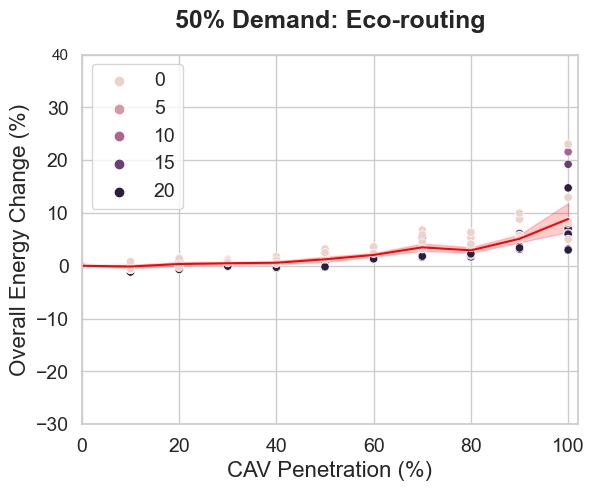

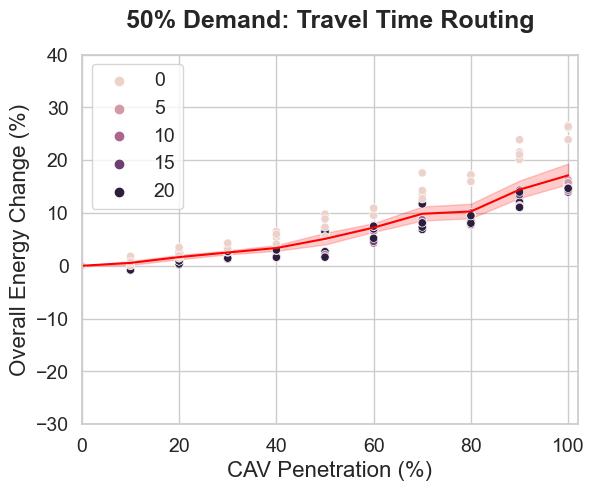

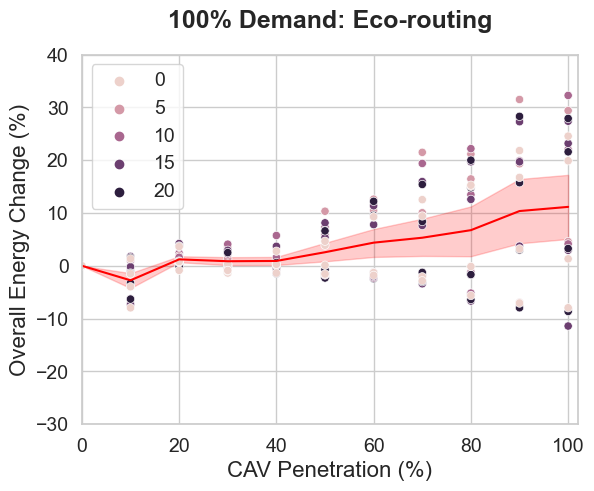

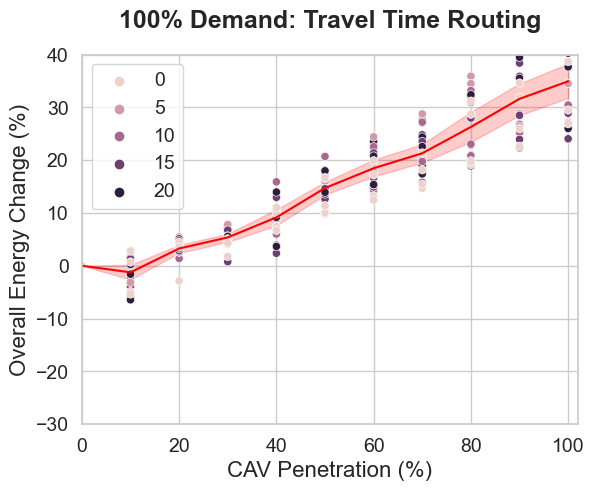

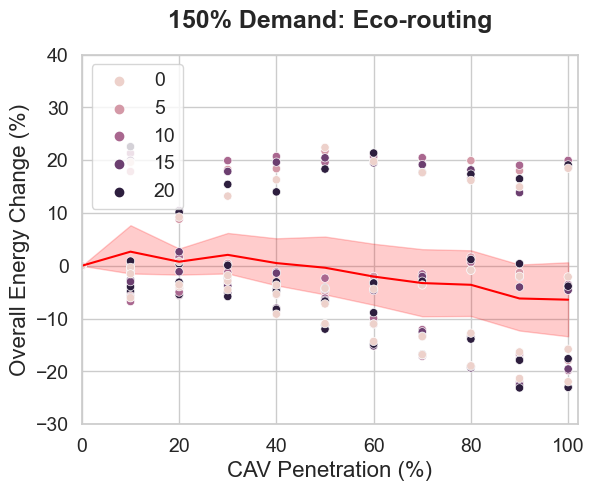

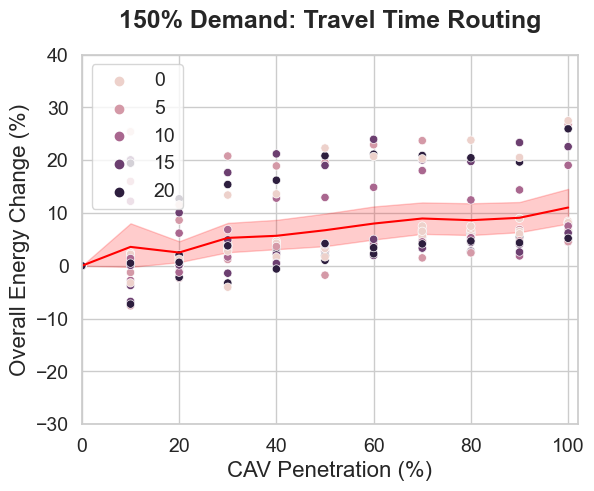

In [14]:
# compare different demands and routing strategies

whether_save_fig = False
demand_percentage = 50
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

demand_percentage = 100
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

demand_percentage = 150
eco_routing_with_travel_time = 0
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)
eco_routing_with_travel_time = 1
plotCompareRouting(demand_percentage, eco_routing_with_travel_time, save_fig = whether_save_fig)

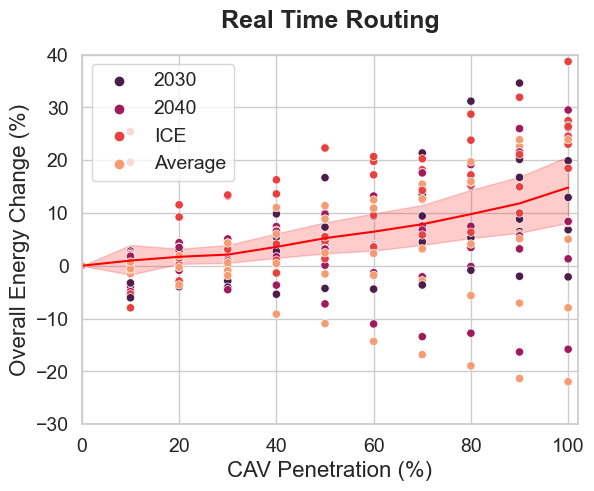

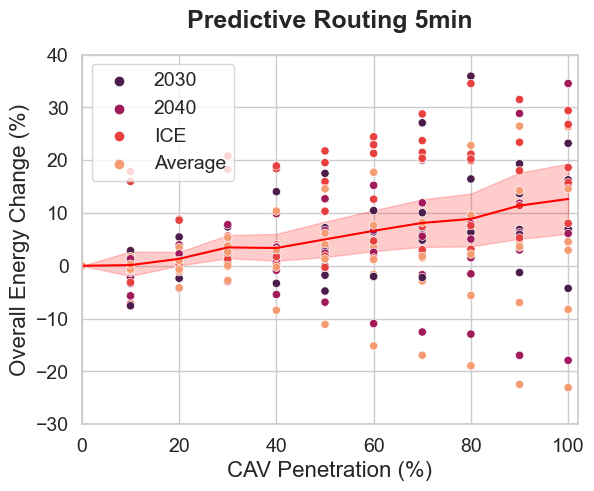

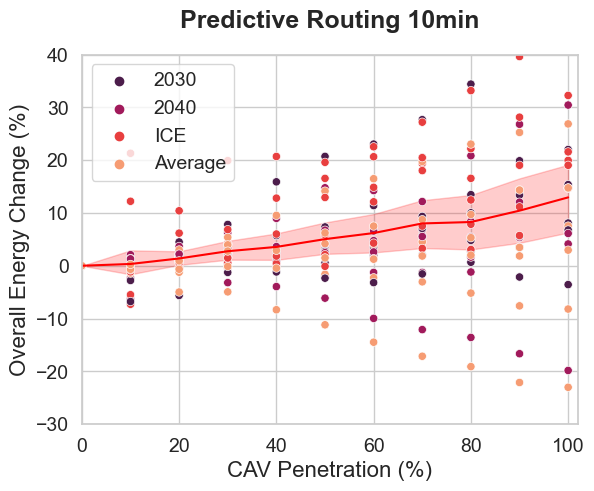

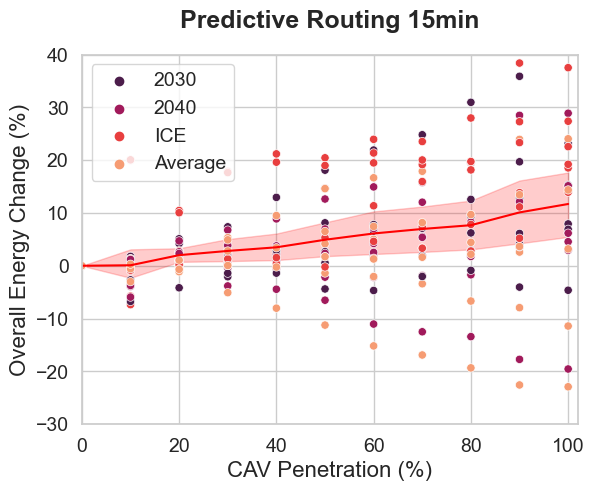

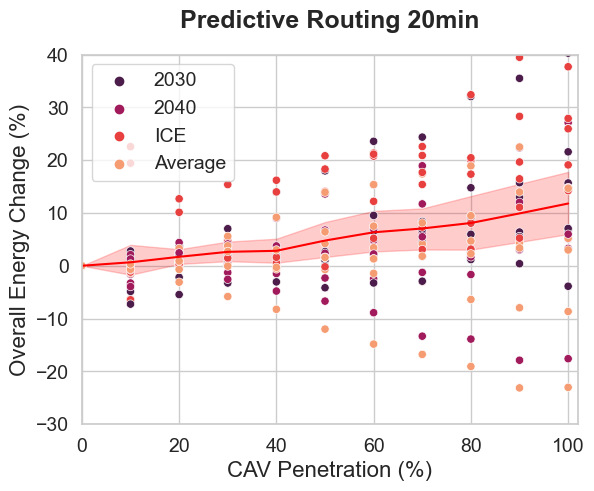

In [10]:
# compare different prediction horizon

whether_save_fig = False
predict_horizon = 0
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 5
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 10
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 15
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)
predict_horizon = 20
plotComparePrediction(predict_horizon, save_fig = whether_save_fig)

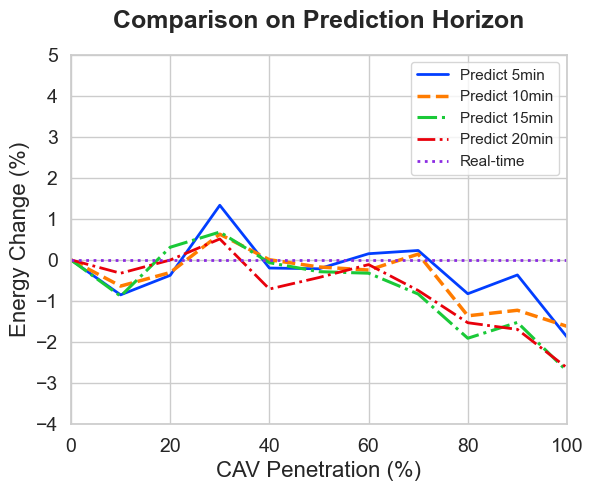

In [11]:
# compare different prediction horizon
plotComparePredictHorizon(save_fig = False)

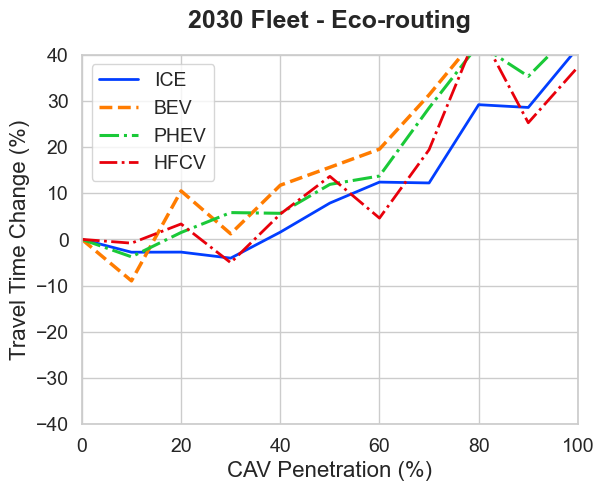

In [12]:
# only for test

vehicle_fleet='2030'
demand_percentage=100
eco_routing_with_travel_time=0
prediction_horizon=5
save_fig=False

linewidths = [2, 2.5, 2.2, 2]
linestyles = ['solid', 'dashed', 'dashdot', 'dashdot']

sns.set_theme(style='whitegrid', palette='bright')
# sns.set_style("whitegrid")
statistics_df = plot_global.statistics_df
target_df = statistics_df[(statistics_df['Vehicle_Fleet'] == vehicle_fleet)
                            & (statistics_df['Demand_Percentage(%)'] == demand_percentage)
                            & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == eco_routing_with_travel_time)
                            & (statistics_df['Prediction_Horizon(min)'] == prediction_horizon)]

g = sns.lineplot(x='CAV_Penetration(%)', y='ICE_TravelTime_Reduction',
                    data=target_df, label='ICE', linewidth=linewidths[0], linestyle=linestyles[0])
if vehicle_fleet != 'ICE':
    g = sns.lineplot(x='CAV_Penetration(%)', y='BEV_TravelTime_Reduction',
                        data=target_df, label='BEV', linewidth=linewidths[1], linestyle=linestyles[1])
    g = sns.lineplot(x='CAV_Penetration(%)', y='PHEV_TravelTime_Reduction',
                        data=target_df, label='PHEV', linewidth=linewidths[2], linestyle=linestyles[2])
    g = sns.lineplot(x='CAV_Penetration(%)', y='HFCV_TravelTime_Reduction',
                        data=target_df, label='HFCV', linewidth=linewidths[3], linestyle=linestyles[3])
# if prediction_horizon == 0:
#     title = '{} Fleet: Demand {}% Real-time '.format(
#         vehicle_fleet, demand_percentage)
# else:
#     title = '{} Fleet: Demand {}% Predict {}min '.format(
#         vehicle_fleet, demand_percentage, prediction_horizon)
title = '{} Fleet - '.format(vehicle_fleet)
if eco_routing_with_travel_time:
    title += 'Travel time routing'
else:
    title += 'Eco-routing'
plt.ylim([-40, 40])
plt.xlim([0, 100])
plt.title(title, fontweight='bold', fontsize=18, y=1.05)
plt.ylabel("Travel Time Change (%)", fontsize=16)
plt.xlabel("CAV Penetration (%)", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)
if save_fig:
    file_name = 'figures/{}_Demand_{}_Predict_{}'.format(
        vehicle_fleet, demand_percentage, prediction_horizon)
    if eco_routing_with_travel_time:
        file_name += '_TravelTimeRouting.pdf'
    else:
        file_name += '_Ecorouting.pdf'
    if os.path.isfile(file_name):
        os.remove(file_name)
    plt.savefig(file_name, bbox_inches='tight')  # , format='pdf')

plt.show(block=False)